/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_1017/1213718207.py:39: RuntimeWarning: divide by zero encountered in divide
  ynormuncertainty2 = ynorm2 * np.sqrt((y_error2/y_data2)**2 + (y_error2[20]/y_data2[20])**2)
/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_1017/1213718207.py:39: RuntimeWarning: invalid value encountered in multiply
  ynormuncertainty2 = ynorm2 * np.sqrt((y_error2/y_data2)**2 + (y_error2[20]/y_data2[20])**2)
/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_1017/1213718207.py:42: RuntimeWarning: divide by zero encountered in divide
  ynormuncertainty3 = ynorm3 * np.sqrt((y_error3/y_data3)**2 + (y_error3[20]/y_data3[20])**2)
/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_1017/1213718207.py:42: RuntimeWarning: invalid value encountered in multiply
  ynormuncertainty3 = ynorm3 * np.sqrt((y_error3/y_data3)**2 + (y_error3[20]/y_data3[20])**2)


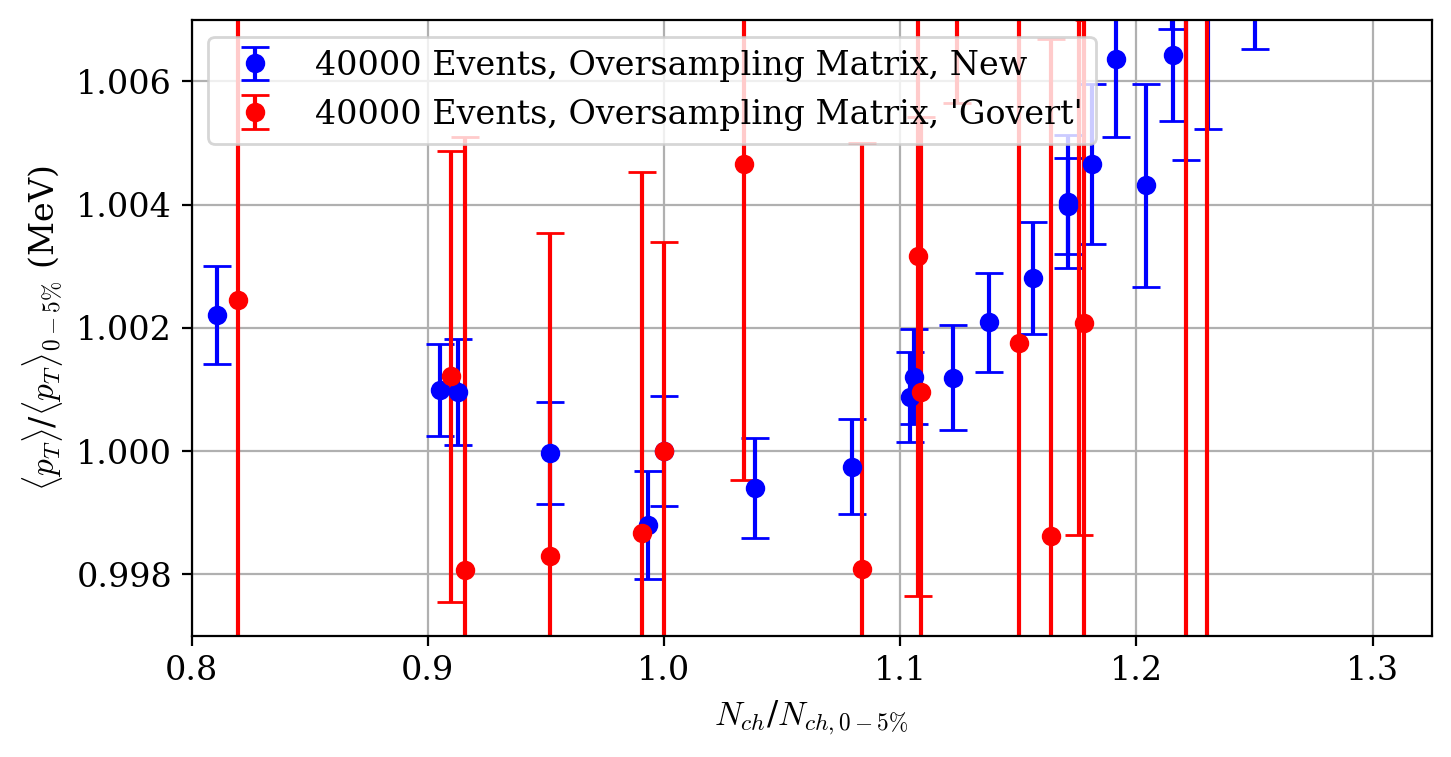

In [21]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution

#filepath1 = "/Users/christianschmidt/Desktop/trajectum-2.1/src/10k_AuAu_200GeV_NewNorm.h5"
filepath1 = "/Users/christianschmidt/Desktop/trajectum-2.1/src/40k_200GeV_AuAu.h5"
filepath2 = "/Users/christianschmidt/Desktop/trajectum-2.1/src/TEMPAuAu.h5"
filepath3 = "/Users/christianschmidt/Desktop/trajectum-2.1/src/BOTHAuAu.h5"
x_root = "multiplicitycharged/STARTPC/centralitybinned/values"
y_root = "meanptcharged/STARTPC/centralitybinned/values"
upperuncertainty_root = "meanptcharged/STARTPC/centralitybinned/uppererrors"
loweruncertainty_root = "meanptcharged/STARTPC/centralitybinned/lowererrors"

with h5py.File(filepath1, "r") as hdf:
    x_data1 = hdf[x_root][:].ravel()
    y_data1 = hdf[y_root][:].ravel()
    y_error1 = np.abs(hdf[upperuncertainty_root][:].ravel()) +np.abs(hdf[loweruncertainty_root][:].ravel()) /2

with h5py.File(filepath2, "r") as hdf:
    x_data2 = hdf[x_root][:].ravel()
    y_data2 = hdf[y_root][:].ravel()
    y_error2 = np.abs(hdf[upperuncertainty_root][:].ravel()) +np.abs(hdf[loweruncertainty_root][:].ravel()) /2

with h5py.File(filepath3, "r") as hdf:
    x_data3 = hdf[x_root][:].ravel()
    y_data3 = hdf[y_root][:].ravel()
    y_error3 = np.abs(hdf[upperuncertainty_root][:].ravel()) +np.abs(hdf[loweruncertainty_root][:].ravel()) /2


#0-5% is index 20
xnorm1 = x_data1 / x_data1[20]
ynorm1 = y_data1 / y_data1[20]
ynormuncertainty1 = ynorm1 * np.sqrt((y_error1/y_data1)**2 + (y_error1[20]/y_data1[20])**2)
xnorm2 = x_data2 / x_data2[20]
ynorm2 = y_data2 / y_data2[20]
ynormuncertainty2 = ynorm2 * np.sqrt((y_error2/y_data2)**2 + (y_error2[20]/y_data2[20])**2)
xnorm3 = x_data3 / x_data3[20]
ynorm3 = y_data3 / y_data3[20]
ynormuncertainty3 = ynorm3 * np.sqrt((y_error3/y_data3)**2 + (y_error3[20]/y_data3[20])**2)

plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 4), dpi=200)
plt.errorbar(xnorm1, ynorm1, yerr=ynormuncertainty1, fmt="o", capsize=5, color="blue", ecolor="blue", label = r"40000 Events, Oversampling Matrix, New")
plt.errorbar(xnorm2, ynorm2, yerr=ynormuncertainty2, fmt="o", capsize=5, color="red", ecolor="red", label = r"40000 Events, Oversampling Matrix, 'Govert'")
#plt.errorbar(xnorm3, ynorm3, yerr=ynormuncertainty3, fmt="o", capsize=5, color="green", ecolor="green", label = r"40000 Events, 1:2 oversampling, Carya")
plt.xlabel(r"$N_{ch}$/$N_{ch, 0-5\%}$")
plt.ylabel(r"$\langle p_T \rangle$/$\langle p_T \rangle_{0-5\%}$ (MeV)")
plt.ylim([0.997,1.007])
plt.xlim([0.8,1.325])
plt.grid()
plt.legend()
plt.show()

#Compare to PbPb



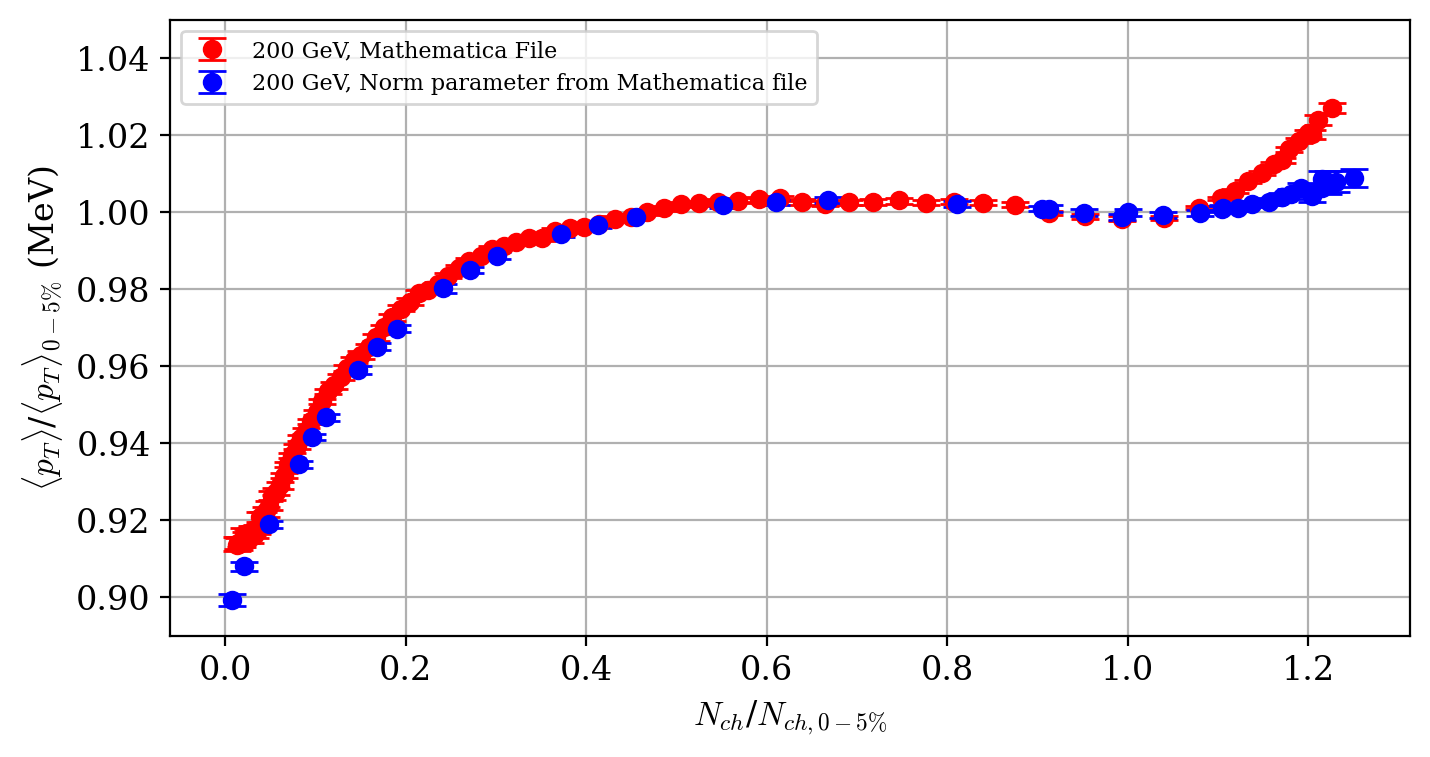

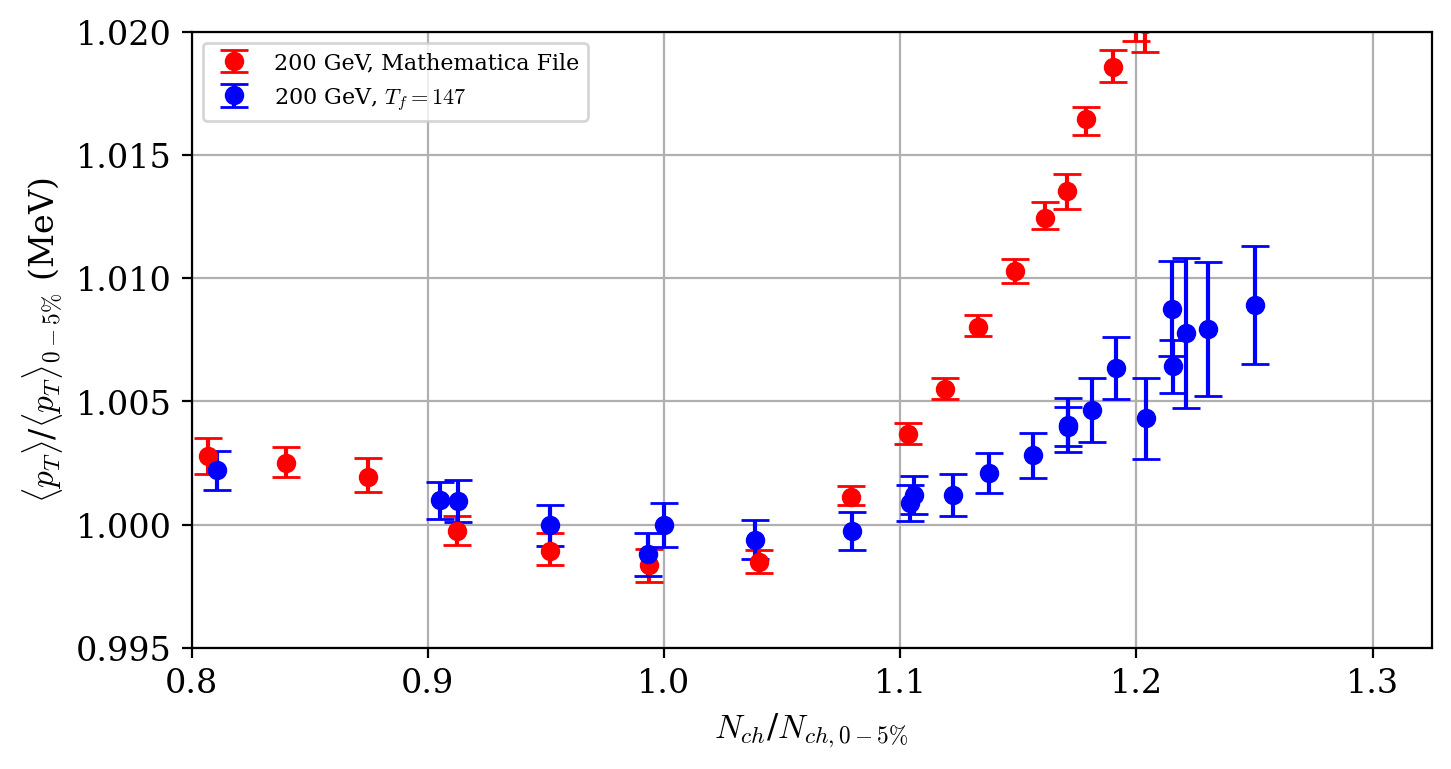

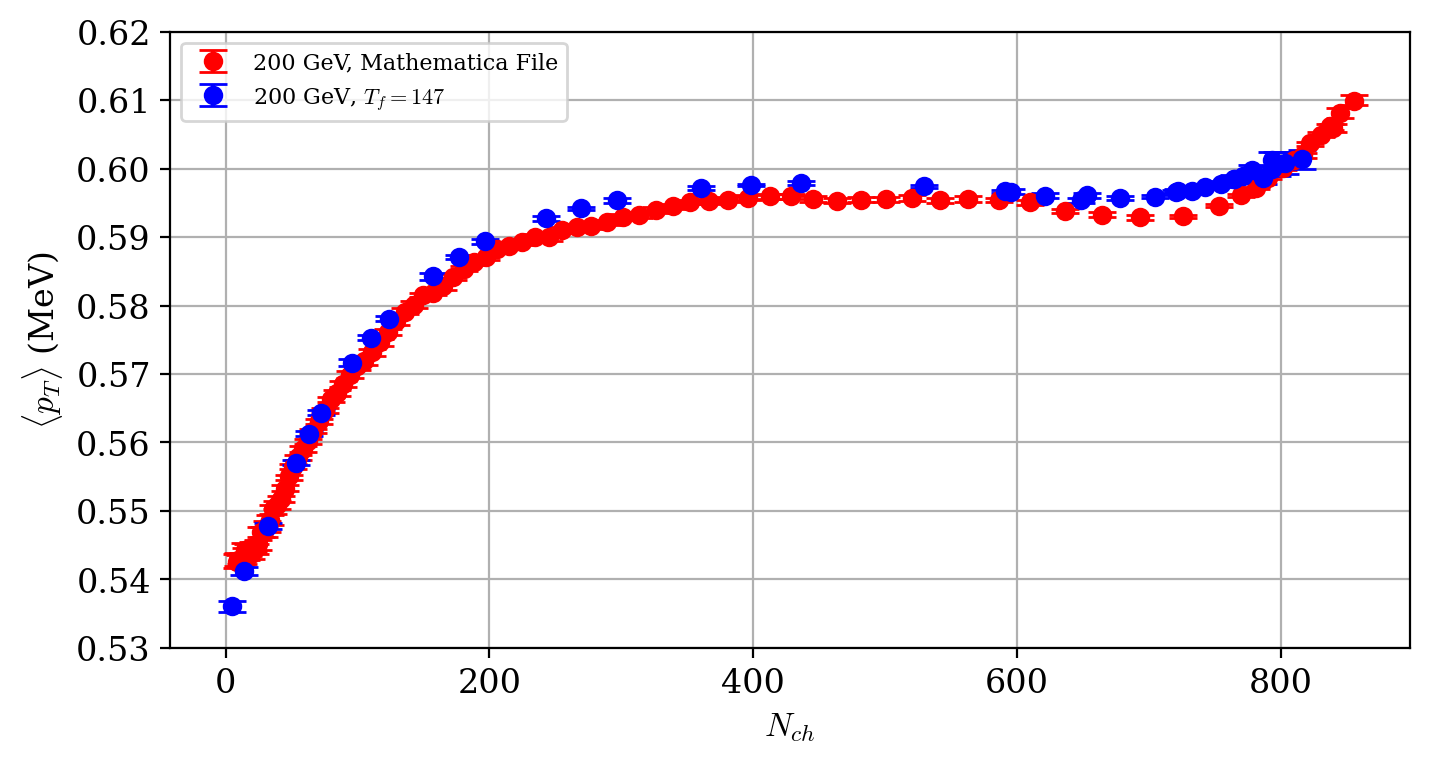

In [24]:
mathematica_pt_norm = np.loadtxt("pT_norm_mathematica.txt", delimiter="\t", skiprows=1)
mathematica_Nch_norm = np.loadtxt("Nch_norm_mathematica.txt", delimiter="\t", skiprows=1)

mathematica_xnorm = mathematica_Nch_norm[:,0]
mathematica_ynorm = mathematica_pt_norm[:,0]
mathematica_ynorm_lowererrors = mathematica_pt_norm[:,1]
mathematica_ynorm_uppererrors = mathematica_pt_norm[:,2]


plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 4), dpi=200)

plt.errorbar(mathematica_xnorm, mathematica_ynorm, yerr=[mathematica_ynorm_lowererrors,mathematica_ynorm_uppererrors], fmt="o", capsize=5, color="red", ecolor="red", label = r"200 GeV, Mathematica File")
plt.errorbar(xnorm1, ynorm1, yerr=ynormuncertainty1, fmt="o", capsize=5, color="blue", ecolor="blue", label = r"200 GeV, Norm parameter from Mathematica file")

plt.xlabel(r"$N_{ch}$/$N_{ch, 0-5\%}$")
plt.ylabel(r"$\langle p_T \rangle$/$\langle p_T \rangle_{0-5\%}$ (MeV)")
#plt.xlim([0.8,1.325])
plt.ylim([0.89,1.05])
plt.grid()
plt.legend(prop={'size': '8'})

plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 4), dpi=200)

plt.errorbar(mathematica_xnorm, mathematica_ynorm, yerr=[mathematica_ynorm_lowererrors,mathematica_ynorm_uppererrors], fmt="o", capsize=5, color="red", ecolor="red", label = r"200 GeV, Mathematica File")
plt.errorbar(xnorm1, ynorm1, yerr=ynormuncertainty1, fmt="o", capsize=5, color="blue", ecolor="blue", label = r"200 GeV, $T_f = 147$")
#plt.errorbar(xnorm2, ynorm2, yerr=ynormuncertainty2, fmt="o", capsize=5, color="green", ecolor="green", label = r"200 GeV, $T_f = 149$")
#plt.errorbar(xnorm3, ynorm3, yerr=ynormuncertainty3, fmt="o", capsize=5, color="purple", ecolor="green", label = r"200 GeV, Freezeout temp and Norm parameter from Mathematica file")
plt.xlabel(r"$N_{ch}$/$N_{ch, 0-5\%}$")
plt.ylabel(r"$\langle p_T \rangle$/$\langle p_T \rangle_{0-5\%}$ (MeV)")
plt.xlim([0.8,1.325])
plt.ylim([0.995,1.02])
plt.grid()
plt.legend(prop={'size': '8'})

mathematica_pt = np.loadtxt("pT_mathematica.txt", delimiter="\t", skiprows=1)
mathematica_Nch = np.loadtxt("Nch_mathematica.txt", delimiter="\t", skiprows=1)

mathematica_x = mathematica_Nch[:,0]
mathematica_y = mathematica_pt[:,0]
mathematica_y_lowererrors = mathematica_pt[:,1]
mathematica_y_uppererrors = mathematica_pt[:,2]


plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 4), dpi=200)

plt.errorbar(mathematica_x, mathematica_y, yerr=[mathematica_y_lowererrors,mathematica_y_uppererrors], fmt="o", capsize=5, color="red", ecolor="red", label = r"200 GeV, Mathematica File")
plt.errorbar(x_data1, y_data1, yerr=y_error1, fmt="o", capsize=5, color="blue", ecolor="blue", label = r"200 GeV, $T_f = 147$")
#plt.errorbar(x_data2, y_data2, yerr=y_error2, fmt="o", capsize=5, color="green", ecolor="green", label = r"200 GeV, $T_f = 149$")
#plt.errorbar(x_data3, y_data3, yerr=y_error3, fmt="o", capsize=5, color="purple", ecolor="green", label = r"200 GeV, Freezeout temp and Norm parameter from Mathematica file")
plt.xlabel(r"$N_{ch}$")
plt.ylabel(r"$\langle p_T \rangle$ (MeV)")
#plt.xlim([0.8,1.325])
plt.ylim([0.53,0.62])
plt.grid()
plt.legend(prop={'size': '8'})